# Seaborn plotting 개요

* Seaborn은 Matplotlib을 기반으로 한다.
* 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.
* 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

### seaborn의 장점
* matplotlib에 비해 시각적으로 우수한 결과물을 만들어 낸다.
* matplotlib에 비해 옵션이 간단하다.
* seaborn의 경우 data exploration에 좀 더 특화

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data Loading
iris = pd.read_csv("./data/iris.csv")
tips = pd.read_csv("./data/tips.csv")

## Figure-level vs. axes-level

* Axes-level : 개별 함수를 호출하여 그래프를 생성한다. 일반적인 matplotlib.pyplot.Axes object로 그래프가 생성된다.
* Figure-level : 자기만의 고유 figure로 그래프가 생성된다.
![](https://github.com/aonekoda/Visualization/blob/main/img/seaborn.png?raw=1)

### Axes-level functions


<AxesSubplot:xlabel='petal_length', ylabel='Count'>

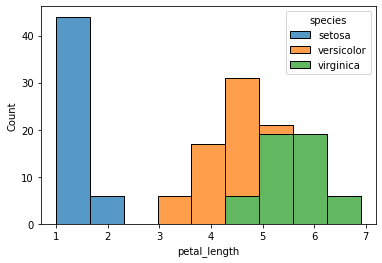

In [3]:
sns.histplot(data=iris, x="petal_length", hue="species", multiple="stack")

### figure-level functions

distplot은 distributions module의 figure-level function이다.   
위의 `sns.histplot`과 동일하게 히스토그램을 그리지만 조금 다르다.  
legend가그래프 외부에 생기고 shape도 좀 다르다.

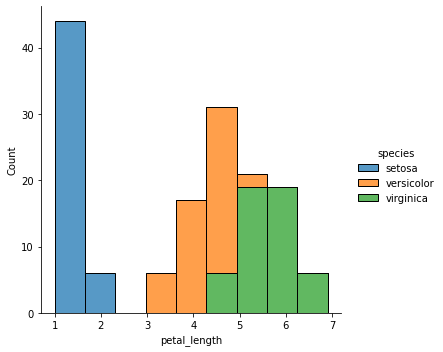

In [4]:
sns.displot(data=iris, x="petal_length", hue="species", multiple="stack", kind="hist")

figure-level functions의 가장 유용한 점은 간단히 여러개의 subplot을 생성할 수 있다는 것이다. 아래 그래프는 `species` 를 기준으로 3개의 다른 subplot을 생성한다. x축, y축이 동일한 scale으로 표시된다. 

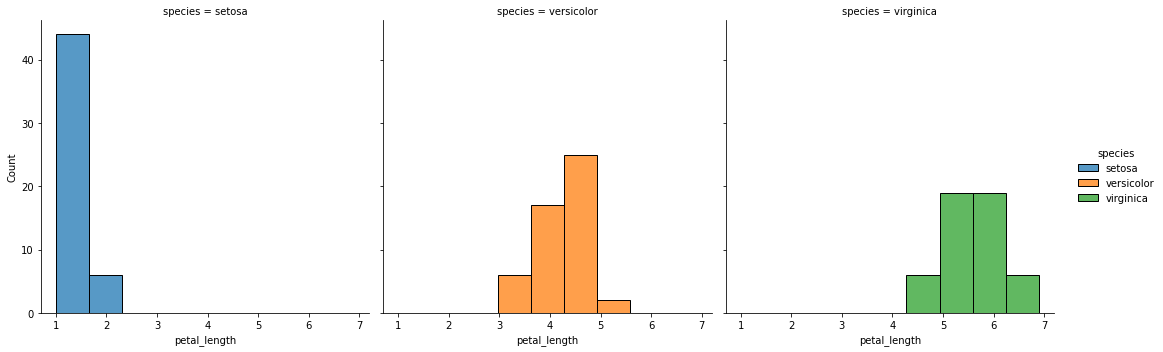

In [5]:
sns.displot(data=iris, x="petal_length", hue="species", col="species")

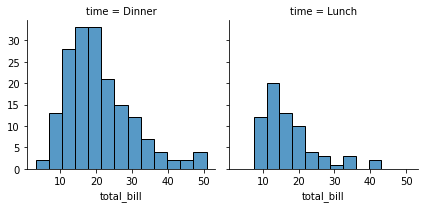

In [6]:
# time을 그룹으로 2개로 나누어 그린다.
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.histplot, 'total_bill' )

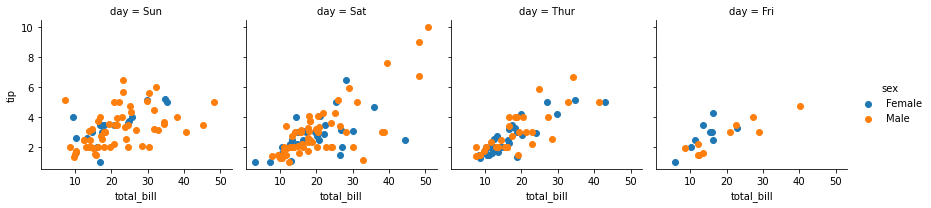

In [7]:
# 그래프를 day를 기준으로 나눈다.
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend()

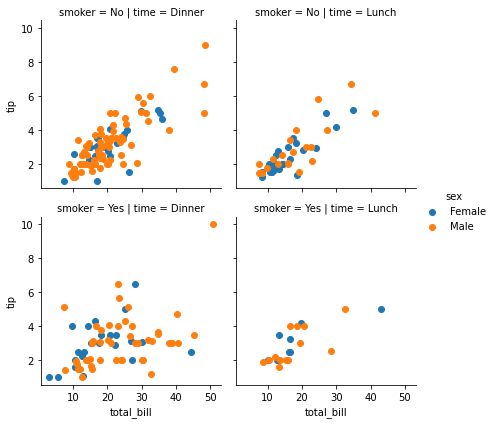

In [8]:
# 그래프를 행/열 구조로 나누어 그린다.
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

## long-format vs wide-format data



다음 데이터셋은 long format이다. 해당 데이터셋은 1949년에서 1960년까지의 월별 비행 승객수를 나타낸다.

In [10]:
flights = pd.read_csv('./data/flight.csv')

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


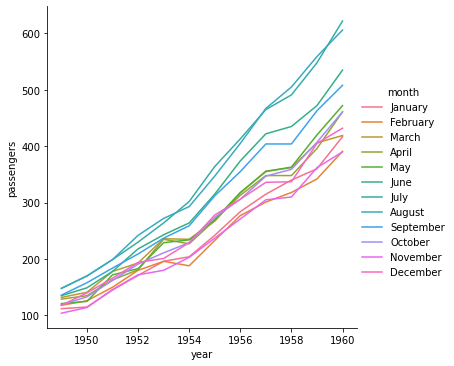

In [11]:
# 연간 승객 수에 대한 월별 차트를 그리면 다음과 같다.
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

wide-format은 다음과 같다.  
다음과 같이 월별 승객수를 pivot을 통해 집계하여 wide-format의 데이터 셋으로 생성한다.

In [12]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


seaborn에서는 data에 x, y값이 할당하지 않으면 해당 데이터셋을 wide-format으로 취급한다.

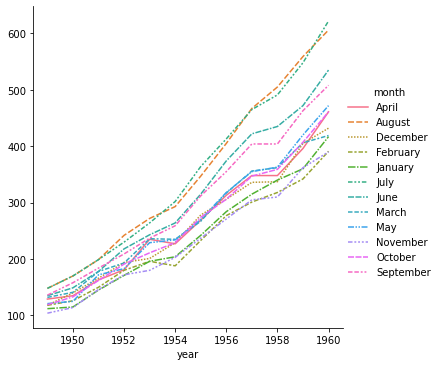

In [13]:
sns.relplot(data=flights_wide, kind="line")